In [14]:
import pandas as pd
import datetime as dt
import numpy as np
from importlib import reload 
import matplotlib.pyplot as plt

In [2]:
# import tickers
import tickers
reload(tickers)
from tickers import japan_tickers, china_tickers, us_tickers, ticker_id, swiss_tickers

import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import extract_max

import stock_analysis_functions
reload(stock_analysis_functions)
from stock_analysis_functions import returns, data_from_yahoo

In [3]:
country_names = ['China', 'USA', 'Japan', 'Switzerland']

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 1)

In [4]:
datasets_chn = data_from_yahoo(china_tickers, ticker_id, start, end, 'china', read=True)
datasets_us = data_from_yahoo(us_tickers, ticker_id, start, end, 'usa', read=True)
datasets_jpn = data_from_yahoo(japan_tickers, ticker_id, start, end, 'japan', read=True)
datasets_swiss = data_from_yahoo(swiss_tickers, ticker_id, start, end, 'swiss', read=True)

adj_close = {'China':datasets_chn['adj_close'], 'USA':datasets_us['adj_close'], 'Japan':datasets_jpn['adj_close'], 'Switzerland':datasets_swiss['adj_close']}

In [5]:
index = adj_close['China']['Date'] 

In [6]:
df_return_china = returns(adj_close['China'].columns, adj_close['China'], index, 'China', True, True)
df_return_usa = returns(adj_close['USA'].columns, adj_close['USA'], index, 'USA', True, True)
df_return_japan = returns(adj_close['Japan'].columns, adj_close['Japan'], index, 'Japan', True, True)
df_return_swiss = returns(adj_close['Switzerland'].columns, adj_close['Switzerland'], index, 'Switzerland', True, True)

df_returns = {'China':df_return_china, 'USA':df_return_usa, 'Japan':df_return_japan, 'Switzerland':df_return_swiss}

## CHINA  <a class="anchor" id="china"></a>

In [7]:
country = 'China'

In [8]:
df_returns[country].head()

,TCEHY,BABA,MOUTAI,1398.HK,PNGAY,PDD,CICHY,3968.HK,ACGBY,JD,...,WXXWY,600309.SS,2202.HK,601633.SS,300015.SZ,600887.SS,BKFCF,AS7.F,6862.HK,300059.SZ
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-1.704096,-1.260411,-4.552203,-0.826445,-0.370216,-0.824643,-2.328221,0.121217,-1.160716,0.689112,...,0.204510,1.878690,-2.911204,-0.326084,-0.278480,-0.031497,0.0,-1.243900,2.318386,0.628935
2020-01-06,-0.530282,-0.165899,-0.052854,-1.166668,0.289024,-1.956467,-0.465116,-0.968520,-0.813006,0.026318,...,-3.592189,-3.055843,-1.349316,-2.290075,-2.157905,-2.047885,0.0,-0.963195,-2.265855,0.937492
2020-01-07,2.070939,0.456982,1.534335,-0.337271,-0.452867,2.793711,-1.168230,-0.122254,-0.819670,0.842104,...,3.993570,-0.760872,0.607896,2.120529,1.686559,3.409461,0.0,6.857844,3.554867,-0.061918
2020-01-08,-0.261146,0.170011,-0.583807,-1.184426,-0.330858,-1.722881,0.236401,-2.325578,-0.367304,-0.052193,...,-0.153577,-0.967508,-0.604223,-1.857923,-0.969630,0.124408,0.0,-2.683773,1.343291,-3.717463


### EQUALLY WEIGHTED

In [9]:
df_returns[country] = df_returns[country].iloc[1:] # ignore first row
ew_portfolio = df_returns[country].mean(axis=1).values

### VALUE WEIGHTED


In [10]:
# names two groups
stocks_60_names =  ['MOUTAI', 'MINDRAY', 'BABA', 'CTGDF', 'FOSHAN']
stocks_40_names = [ stock for stock in df_returns[country].columns if stock not in stocks_60_names]  

# stocks value two groups
stocks_60 = df_returns[country][stocks_60_names]
stocks_40 = df_returns[country][stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
vw_portfolio = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

In [11]:
# build dataframe
df_portfolio = pd.DataFrame(index=df_returns[country].index)
df_portfolio['EW'] = ew_portfolio
df_portfolio['VW'] = vw_portfolio
df_portfolio.head()

,EW,VW
Date,,
2020-01-03,-0.567323,-1.190934
2020-01-06,-0.882252,-0.811192
2020-01-07,0.772575,1.187298
2020-01-08,-0.519914,-0.246405
2020-01-09,1.819714,2.245515


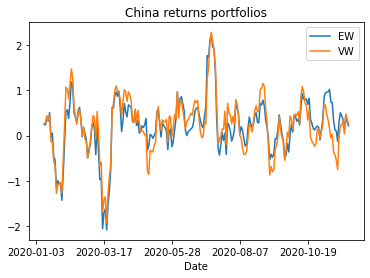

In [16]:
df_portfolio.rolling(7).mean().plot()
titlee = country + ' returns portfolios'
plt.title(titlee)
plt.savefig(f"plots_stocks/{country}_portfolio.PNG")
plt.show()

In [17]:
df_portfolio.to_csv(f'datasets/{country}_portfolio.csv')

In [18]:
df_portfolio.std()

EW    1.519515
VW    1.623051
dtype: float64

## USA  <a class="anchor" id="usa"></a>

In [19]:
country = 'USA'

In [20]:
df_returns[country].head()

,AAPL,MSFT,AMZN,GOOG,GOOGL,FB,TSLA,BABA,TSM,BRK-A,...,TMO,XOM,CSCO,ABBV,ORCL,CVX,ACN,AVGO,QCOM,DHR
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.972216,-1.245165,-1.213905,-0.490720,-0.523134,-0.529126,2.963319,-1.260411,-3.297798,-0.907495,...,-1.087714,-0.803941,-1.631553,-0.949181,-0.352180,-0.345870,-0.166554,-2.543500,-1.882957,-0.618931
2020-01-06,0.796824,0.258478,1.488559,2.465710,2.665406,1.883360,1.925466,-0.165899,-1.153980,0.311067,...,0.718666,0.767805,0.356914,0.789172,0.520838,-0.338816,-0.652990,-0.149599,-0.586073,0.298422
2020-01-07,-0.470300,-0.911767,0.209156,-0.062401,-0.193165,0.216365,3.880053,0.456982,1.620494,-0.384762,...,0.565908,-0.818406,-0.648539,-0.570468,0.222054,-1.276949,-2.159017,-0.344250,2.843615,0.983131
2020-01-08,1.608636,1.592822,-0.780866,0.788033,0.711776,1.013801,4.920485,0.170011,0.737305,0.084685,...,0.159027,-1.508025,0.063177,0.708743,0.389472,-1.142274,0.196167,-1.247453,-0.292243,0.102465


### EQUALLY WEIGHTED

In [21]:
df_returns[country] = df_returns[country].iloc[1:] # ignore first row
ew_portfolio = df_returns[country].mean(axis=1).values

### VALUE WEIGHTED


In [22]:
# names two groups
stocks_60_names =  ['BRK-A', 'AMZN', 'GOOG', 'GOOGL', 'NFLX']
stocks_40_names = [ stock for stock in df_returns[country].columns if stock not in stocks_60_names]  

# stocks value two groups
stocks_60 = df_returns[country][stocks_60_names]
stocks_40 = df_returns[country][stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
vw_portfolio = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

In [23]:
# build dataframe
df_portfolio = pd.DataFrame(index=df_returns[country].index)
df_portfolio['EW'] = ew_portfolio
df_portfolio['VW'] = vw_portfolio
df_portfolio.head()

,EW,VW
Date,,
2020-01-03,-0.898291,-0.879362
2020-01-06,0.455514,1.309527
2020-01-07,-0.173111,-0.292702
2020-01-08,0.555981,0.622157
2020-01-09,0.517048,0.538031


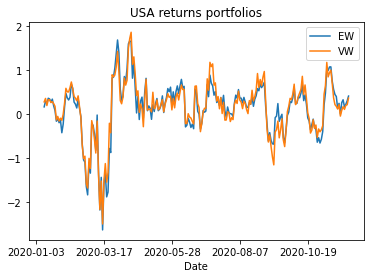

In [24]:
df_portfolio.rolling(7).mean().plot()
titlee = country + ' returns portfolios'
plt.title(titlee)
plt.savefig(f"plots_stocks/{country}_portfolio.PNG")
plt.show()

In [25]:
df_portfolio.to_csv(f'datasets/{country}_portfolio.csv')

In [26]:
df_portfolio.std()

EW    2.163475
VW    2.072784
dtype: float64

## JAPAN  <a class="anchor" id="japan"></a>

In [27]:
country = 'Japan'

In [28]:
df_returns[country].head()

,TM,MITSUB,HMC,1JP.F,NPEXY,ITOCY,NSANY,SFTBY,HTHIY,JXHLY,...,NHOLF,SSUMY,MZDAY,KAEPY,MAHLY,SMTOF,FUJHY,CHUEF,EJPRY,NEC1.F
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-1.047525,NaN,-1.780734,1.197594,0.0,-0.579653,-0.687285,-1.409724,-1.206084,-2.065219,...,0.0,-1.546737,-0.941174,0.0,0.000000,0.000000,-0.803207,0.0,-0.994039,-1.621620
2020-01-06,0.014212,NaN,-0.284390,-1.183421,0.0,0.604618,0.000000,-2.398527,1.481568,5.105441,...,0.0,1.844264,0.000000,0.0,-2.487781,-0.564808,-0.161947,0.0,-0.401602,3.296692
2020-01-07,0.525674,1.196250,0.570409,1.796405,0.0,0.214635,0.865047,0.519850,-0.443831,0.000000,...,0.0,-0.402416,0.475064,0.0,0.000000,0.000000,-0.892133,0.0,0.268815,3.191494
2020-01-08,-0.247327,-1.559015,-0.283590,-1.176478,0.0,0.385522,0.171531,0.517153,-0.305017,1.583941,...,0.0,-0.404042,-0.472818,0.0,0.000000,0.000000,0.245501,0.0,0.335124,2.577319


### EQUALLY WEIGHTED

In [29]:
df_returns[country] = df_returns[country].iloc[1:] # ignore first row
ew_portfolio = df_returns[country].mean(axis=1).values

### VALUE WEIGHTED


In [30]:
# names two groups
stocks_60_names =  ['MITSUB', 'MITSY', 'SZKMY', 'TM', 'SNE']
stocks_40_names = [ stock for stock in df_returns[country].columns if stock not in stocks_60_names]  

# stocks value two groups
stocks_60 = df_returns[country][stocks_60_names]
stocks_40 = df_returns[country][stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
vw_portfolio = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

In [31]:
# build dataframe
df_portfolio = pd.DataFrame(index=df_returns[country].index)
df_portfolio['EW'] = ew_portfolio
df_portfolio['VW'] = vw_portfolio
df_portfolio.head()

,EW,VW
Date,,
2020-01-03,-0.606306,-0.798095
2020-01-06,0.225091,0.427348
2020-01-07,0.195871,0.527549
2020-01-08,0.130477,-0.130530
2020-01-09,0.287765,0.429509


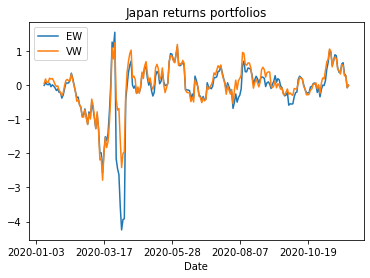

In [34]:
df_portfolio.rolling(7).mean().plot()
titlee = country + ' returns portfolios'
plt.title(titlee)
plt.savefig(f"plots_stocks/{country}_portfolio.PNG")
plt.show()

In [35]:
df_portfolio.to_csv(f'datasets/{country}_portfolio.csv')

In [36]:
df_portfolio.std()

EW    2.167253
VW    1.740446
dtype: float64

## SWITZERLAND  <a class="anchor" id="swiis"></a>

In [37]:
country = 'Switzerland'

In [38]:
df_returns[country].head()

,JNJ,MC,HD,OR,NOVN,PEP,ABT,LLY,PM,SAP,...,SGSN.SW,LOGN,SOON.SW,SLHNE.SW,UHR.SW,BARN.SW,ADEN.SW,TECN.SW,SRCG.SW,ZURN.SW
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-1.157777,-2.560147,-0.332342,-0.823040,-73.054661,-0.139900,-1.219084,-0.332792,-0.187830,-2.068557,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.124744,-0.094967,0.470476,-0.726150,-2.147972,0.383388,0.523917,0.371844,1.164311,0.164207,...,-0.639099,0.0,0.135137,NaN,-1.145600,1.417761,0.263074,-1.382819,2.804960,-0.571574
2020-01-07,0.610673,1.267427,-0.654660,3.552779,-8.536585,-1.571788,-0.555941,0.189023,0.441755,-0.432191,...,-0.151343,0.0,0.404856,NaN,0.373828,0.745580,0.229573,1.107011,0.444165,0.399902
2020-01-08,-0.013784,0.719646,1.496422,-6.559043,1.333332,0.514883,0.407657,0.905613,1.898139,1.092652,...,-0.189468,0.0,0.224014,NaN,0.670389,-1.387608,0.654455,0.875910,-0.694886,-0.149360


### EQUALLY WEIGHTED

In [39]:
df_returns[country] = df_returns[country].iloc[1:] # ignore first row
ew_portfolio = df_returns[country].mean(axis=1).values

### VALUE WEIGHTED


In [40]:
# names two groups
stocks_60_names =  ['LINDT', 'SGSN.SW', 'BARN.SW', 'PGHN.SW', 'SCMN.SW']
stocks_40_names = [ stock for stock in df_returns[country].columns if stock not in stocks_60_names]  

# stocks value two groups
stocks_60 = df_returns[country][stocks_60_names]
stocks_40 = df_returns[country][stocks_40_names]

# mean each group
stocks_60_mean = stocks_60.mean(axis=1).values
stocks_40_mean = stocks_40.mean(axis=1).values

# weight 60 40:
vw_portfolio = stocks_60_mean * 0.6 + stocks_40_mean * 0.4

In [41]:
# build dataframe
df_portfolio = pd.DataFrame(index=df_returns[country].index)
df_portfolio['EW'] = ew_portfolio
df_portfolio['VW'] = vw_portfolio
df_portfolio.head()

,EW,VW
Date,,
2020-01-03,-4.197861,NaN
2020-01-06,0.021097,0.065817
2020-01-07,0.666565,0.486600
2020-01-08,-0.060602,-0.005064
2020-01-09,-0.129355,-0.085470


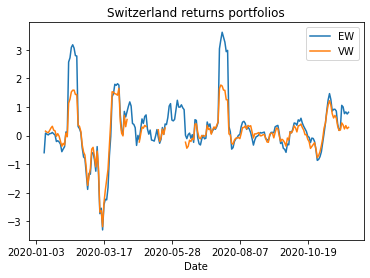

In [44]:
df_portfolio.rolling(7).mean().plot()
titlee = country + ' returns portfolios'
plt.title(titlee)
plt.savefig(f"plots_stocks/{country}_portfolio.PNG")
plt.show()

In [45]:
df_portfolio.to_csv(f'datasets/{country}_portfolio.csv')

In [46]:
df_portfolio.std()

EW    2.482388
VW    1.694269
dtype: float64